In [1]:
# Codingan dibawah ini berfungsi untuk import library / ngambil kodingan dari orang lain

import pandas as pd # Untuk mengolah data
import numpy as np # Untuk mengolah angka
import matplotlib.pylab as plt # Untuk visualisasi
import seaborn as sns # Untuk Visualisasi
%matplotlib inline
from matplotlib.pylab import rcParams #Untuk visualisasi
from datetime import datetime #Untuk mengatasi tipe data tanggal


In [2]:
# Kita ingin import data

data = pd.read_csv('/content/AirPassengers.csv')

In [3]:
# Kita ingin menampilkan data yang sudah di import

data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# Kita ingin mengetahui informasi (tipe data dan missing value) dari masing-masing kolom

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Kita ingin mengubah tipe data di kolom 'Month' dari object menjadi datetime

data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)

In [6]:
# Kita ingin mengetahui informasi (tipe data dan missing value) dari masing-masing kolom

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
# Kolom yang berisi tanggal kita jadikan sebagai index
data=data.set_index(['Month'])
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
# Kita ingin melihat descriptive analisis dari masing-masing kolom kita

data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


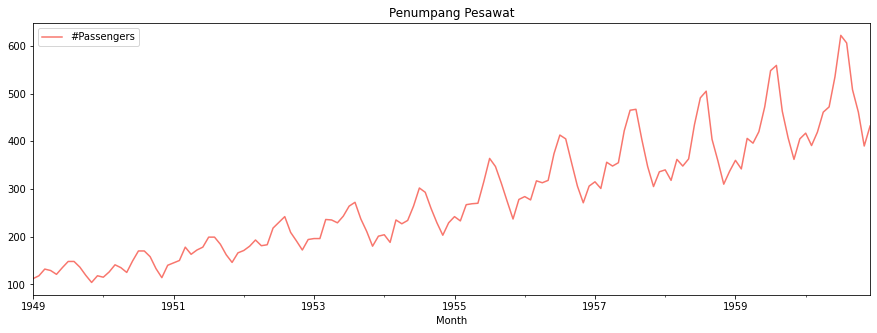

In [9]:
# Kita akan visualisasi data time-seriesnya

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
data.plot(style='-', figsize=(15,5), color=color_pal[0], title="Penumpang Pesawat")
plt.show()

In [10]:
# Membagi data kita menjadi data latih (data_train) dan data uji (data_test)

# Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 
# Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
# Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
test_ratio = 0.2

test_set_size = int(len(data) * test_ratio)
data_train = data[0:-test_set_size].copy()
data_test = data[-test_set_size:].copy()

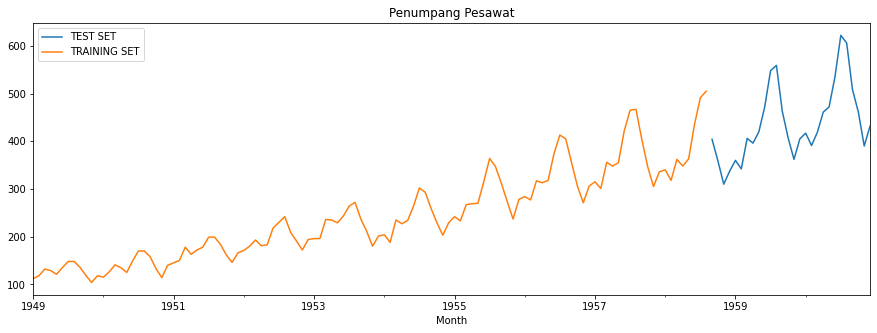

In [11]:
# Plot train and test so you can see where we have split
data_test \
    .rename(columns={'#Passengers': 'TEST SET'}) \
    .join(data_train.rename(columns={'#Passengers': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title="Penumpang Pesawat", style='-')
plt.show()

In [12]:
# Import Library yang akan digunakan untuk memprediksi Time-Series (FbProphet)

from fbprophet import Prophet

In [13]:
# Preprocessing untuk menggunakan Prophet model ini untuk data_train

data_train.reset_index(inplace = True)
data_train.rename(columns={'Month':'ds', '#Passengers':'y'}, inplace = True)
    
data_train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
111,1958-04-01,348
112,1958-05-01,363
113,1958-06-01,435
114,1958-07-01,491


In [14]:
# Preprocessing untuk menggunakan Prophet model ini untuk data_test

data_test.reset_index(inplace = True)
data_test.rename(columns={'Month':'ds', '#Passengers':'y'}, inplace = True)
    
data_test

,ds,y
0,1958-09-01,404
1,1958-10-01,359
2,1958-11-01,310
3,1958-12-01,337
4,1959-01-01,360
5,1959-02-01,342
6,1959-03-01,406
7,1959-04-01,396
8,1959-05-01,420
9,1959-06-01,472


In [15]:
# Ingin melatih model machine learning kita

model1 = Prophet()
model1.fit(data_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# Ingin memprediksi menggunakan model machine learning kita

data_test_fcst = model1.predict(data_test)

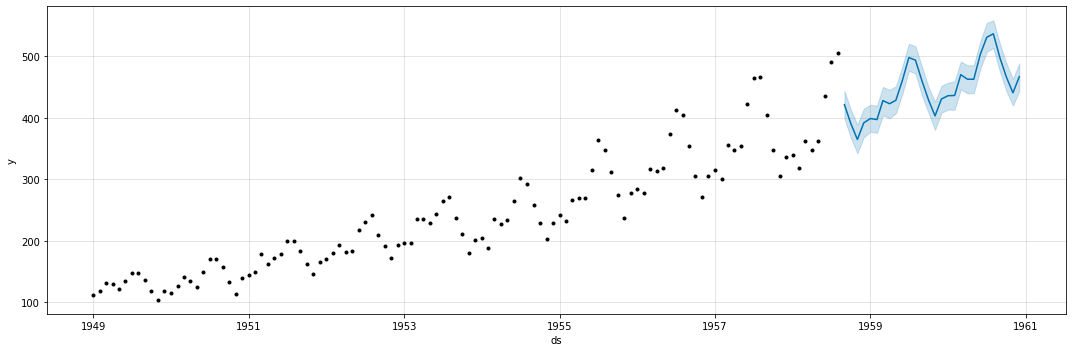

In [17]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model1.plot(data_test_fcst,
                 ax=ax)
plt.show()

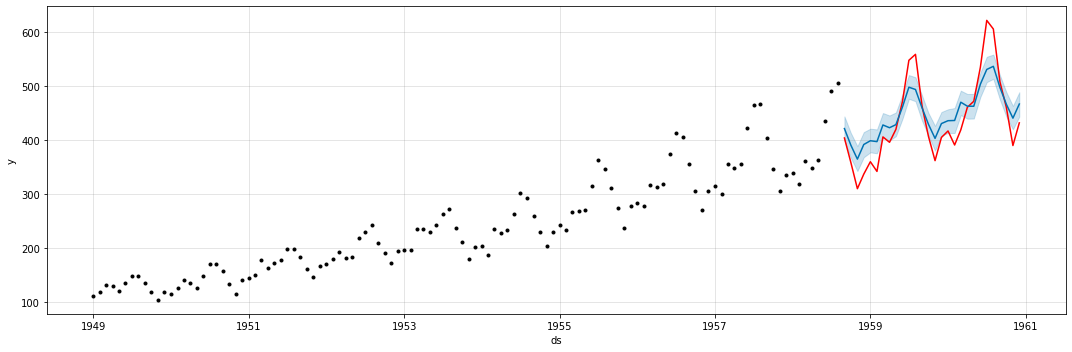

In [22]:
# Visualisasi perbandingan antara hasil prediksi machine learning dengan data yang asli
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(data_test['ds'], data_test['y'], color='r')
fig = model1.plot(data_test_fcst, ax=ax)

In [25]:
# Kita perlu ngebuat dataframe baru
prediksi_tahun_berikutnya = pd.DataFrame(columns=['ds', 'y'])

In [28]:
# Masukan tanggal dari tahun 1962 - 2024 ke kolom ds
prediksi_tahun_berikutnya['ds'] = pd.date_range(start='1962-01-01', end='2024-01-01')

In [29]:
# Tampilkan dataframe terbaru kita
prediksi_tahun_berikutnya

,ds,y
0,1962-01-01,NaN
1,1962-01-02,NaN
2,1962-01-03,NaN
3,1962-01-04,NaN
4,1962-01-05,NaN
...,...,...
22641,2023-12-28,NaN
22642,2023-12-29,NaN
22643,2023-12-30,NaN
22644,2023-12-31,NaN


In [30]:
# Ingin memprediksi menggunakan model machine learning kita

data_test_baru_fcst = model1.predict(prediksi_tahun_berikutnya)

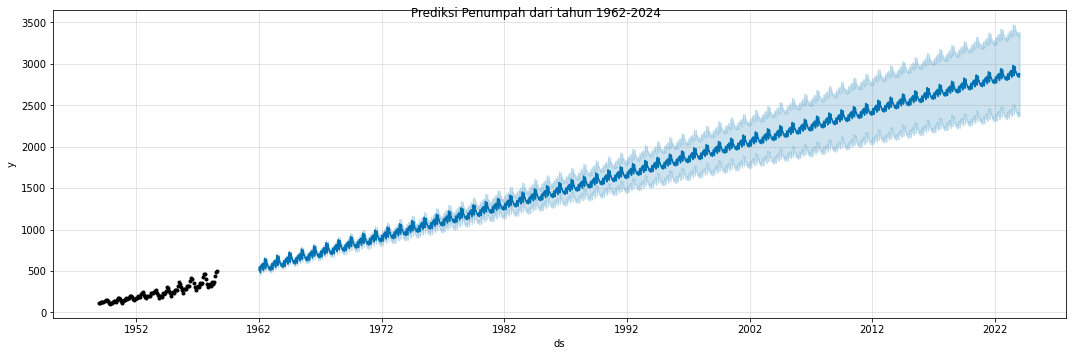

In [32]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model1.plot(data_test_baru_fcst,
                 ax=ax)
fig = plt.suptitle("Prediksi Penumpah dari tahun 1962-2024")
plt.show()